# Introduction


Regression model for predicting the selling price with Car Sale Adverts dataset provided by AutoTrader.

6G7V0017 Advanced Machine Learning 1CWK100

Lecturer : Sir Luciano Gerber

Lip Chuan Sui 19072513

The aim of this case study is to build Regression models on the given dataset for predicting the selling price.


The dataset given has less features compared to last assessment. Age column is removed and thus extra work is needed to fetch age from year of registration. Standard model and body type has more rare categories and are needed to properly addressed. Huge attention on feature engineering are needed to produce good dataframe for training. 


After that , datasets will be split into training and test sets and a number of different models such as Random forests, Gradient Boosted Tree with XGBoost and linear model with selected interactions will be implemented using them. An esemble method will also be used to combine all 3 models. 

In Model Analysis, Predicted vs True plot, residual plot and SHAP value will be used to analysis the results. Google Colab will be used to carry out this case study. 

#Importing data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df_regression = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/adverts.csv'
)

In [40]:
df_regression.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [41]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


##Dropping unrelated data

In [42]:
df_regression =  df_regression.drop(columns = ['public_reference','crossover_car_and_van'] )

Remove unnecessary columns

*   public_reference is long string containing nothing but ID
*   Crossover_car_and_van is unrelated and almost all values are false



#Data inspection and cleaning

In [43]:
# checking null value 
df_regression.isnull().sum()

mileage                   127
reg_code                31857
standard_colour          5378
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration    33311
price                       0
body_type                 837
fuel_type                 601
dtype: int64

##Dealing with year

Reg_code could indicate registration year by referencing from 
https://www.autobulbsdirect.co.uk/blog/car-registration-years-chart/

Missing year of registration could be recovered

In [44]:
## Remove row with both missing value of year of registration and reg_code

df_regression = df_regression.dropna(subset=['year_of_registration', 'reg_code'], how='all')

In [45]:
df_regression.isnull().sum()

mileage                  115
reg_code                 287
standard_colour         4312
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration    1741
price                      0
body_type                722
fuel_type                432
dtype: int64

There is total of 1741 missig value of year of registration.

Attempting to fetch rows which has reg_code and missing years of registraion

Filtering reg_code to make sure is integer 

In [46]:
df2= df_regression.loc[(df_regression['reg_code'].notnull()) & (df_regression['year_of_registration'].isna())
& (df_regression['reg_code'].str.isnumeric()) ]

df2['reg_code'].value_counts()


70    206
17    173
67    173
20    129
18    123
66    111
69    107
19    103
16     82
68     77
15     64
65     53
64     45
13     30
14     25
63     23
62     15
07     15
60     11
06     10
61     10
12     10
11      9
54      9
58      9
10      9
09      8
57      6
08      5
59      5
55      4
56      4
51      4
52      3
04      3
05      3
03      3
02      3
53      2
94      2
95      2
85      1
38      1
37      1
Name: reg_code, dtype: int64

Convert reg_code to years of registraion based on 
https://www.autobulbsdirect.co.uk/blog/car-registration-years-chart/

In [47]:
df_regression.loc[df_regression['reg_code'] == '70', 'year_of_registration'] = 2020
df_regression.loc[df_regression['reg_code'] == '17', 'year_of_registration'] = 2017
df_regression.loc[df_regression['reg_code'] == '67', 'year_of_registration'] = 2018
df_regression.loc[df_regression['reg_code'] == '20', 'year_of_registration'] = 2020
df_regression.loc[df_regression['reg_code'] == '18', 'year_of_registration'] = 2018
df_regression.loc[df_regression['reg_code'] == '66', 'year_of_registration'] = 2016
df_regression.loc[df_regression['reg_code'] == '69', 'year_of_registration'] = 2019
df_regression.loc[df_regression['reg_code'] == '19', 'year_of_registration'] = 2019
df_regression.loc[df_regression['reg_code'] == '16', 'year_of_registration'] = 2016
df_regression.loc[df_regression['reg_code'] == '68', 'year_of_registration'] = 2018
df_regression.loc[df_regression['reg_code'] == '15', 'year_of_registration'] = 2015
df_regression.loc[df_regression['reg_code'] == '65', 'year_of_registration'] = 2015
df_regression.loc[df_regression['reg_code'] == '64', 'year_of_registration'] = 2014
df_regression.loc[df_regression['reg_code'] == '13', 'year_of_registration'] = 2013
df_regression.loc[df_regression['reg_code'] == '14', 'year_of_registration'] = 2014
df_regression.loc[df_regression['reg_code'] == '63', 'year_of_registration'] = 2013
df_regression.loc[df_regression['reg_code'] == '62', 'year_of_registration'] = 2012
df_regression.loc[df_regression['reg_code'] == '07', 'year_of_registration'] = 2007
df_regression.loc[df_regression['reg_code'] == '60', 'year_of_registration'] = 2020
df_regression.loc[df_regression['reg_code'] == '06', 'year_of_registration'] = 2006
df_regression.loc[df_regression['reg_code'] == '61', 'year_of_registration'] = 2011
df_regression.loc[df_regression['reg_code'] == '12', 'year_of_registration'] = 2012
df_regression.loc[df_regression['reg_code'] == '11', 'year_of_registration'] = 2011
df_regression.loc[df_regression['reg_code'] == '54', 'year_of_registration'] = 2004
df_regression.loc[df_regression['reg_code'] == '58', 'year_of_registration'] = 2008
df_regression.loc[df_regression['reg_code'] == '10', 'year_of_registration'] = 2010
df_regression.loc[df_regression['reg_code'] == '09', 'year_of_registration'] = 2009
df_regression.loc[df_regression['reg_code'] == '57', 'year_of_registration'] = 2007
df_regression.loc[df_regression['reg_code'] == '08', 'year_of_registration'] = 2008
df_regression.loc[df_regression['reg_code'] == '59', 'year_of_registration'] = 2009
df_regression.loc[df_regression['reg_code'] == '55', 'year_of_registration'] = 2005
df_regression.loc[df_regression['reg_code'] == '56', 'year_of_registration'] = 2006
df_regression.loc[df_regression['reg_code'] == '51', 'year_of_registration'] = 2001
df_regression.loc[df_regression['reg_code'] == '52', 'year_of_registration'] = 2002
df_regression.loc[df_regression['reg_code'] == '04', 'year_of_registration'] = 2004
df_regression.loc[df_regression['reg_code'] == '05', 'year_of_registration'] = 2005
df_regression.loc[df_regression['reg_code'] == '03', 'year_of_registration'] = 2003
df_regression.loc[df_regression['reg_code'] == '02', 'year_of_registration'] = 2002
df_regression.loc[df_regression['reg_code'] == '53', 'year_of_registration'] = 2003

# left 94 95 85 38 37

Reg_code with 94 ,95,85,38 and 37 are left out because years are after current year 2022. 

The number of missing value of year of registration has been decreased. 


In [48]:
df_regression.isnull().sum()
## fill up year of registration

mileage                  115
reg_code                 287
standard_colour         4312
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration      57
price                      0
body_type                722
fuel_type                432
dtype: int64

Filling null value with mean for year of registration 

In [49]:
df_regression['year_of_registration'].fillna(df_regression['year_of_registration'].mean(), inplace=True)

# Round the year_of_registration values
df_regression['year_of_registration'] = round(df_regression['year_of_registration'])

In [50]:
# reg_code is no longer needed
df_regression =  df_regression.drop(columns = ['reg_code'] )

Remove Outlier which are data that sits further than three standard deviations from the mean

Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.

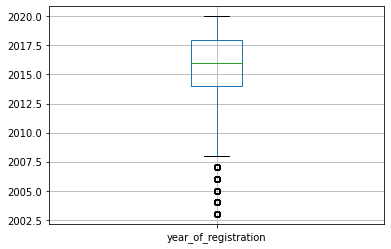

In [51]:
## removing outlier
# Find the mean and standard dev
std_year = df_regression['year_of_registration'].std()
mean_year = df_regression['year_of_registration'].mean()

# Calculate the cutoff
cut_off = std_year * 3
lower, upper = mean_year - cut_off, mean_year + cut_off

# Trim the outliers
df_regression = df_regression[(df_regression['year_of_registration'] < upper) \
                           & (df_regression['year_of_registration'] > lower)]

# The trimmed box plot
df_regression[['year_of_registration']].boxplot()
plt.show()

##Dealing with mileage

Fill missing value with mean 

In [52]:
## fill with mean
df_regression['mileage'].fillna(df_regression['mileage'].mean(), inplace=True)

# Round the mileage values
df_regression['mileage'] = round(df_regression['mileage'])

In [53]:
df_regression.isnull().sum()

mileage                    0
standard_colour         4062
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                654
fuel_type                391
dtype: int64

Remove outlier

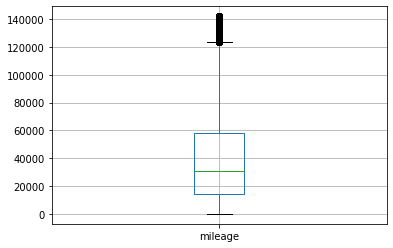

In [54]:
# Find the mean and standard dev
std_mileage = df_regression['mileage'].std()
mean_mileage = df_regression['mileage'].mean()

# Calculate the cutoff
cut_off = std_mileage * 3
lower, upper = mean_mileage - cut_off, mean_mileage + cut_off

# Trim the outliers
df_regression = df_regression[(df_regression['mileage'] < upper) \
                           & (df_regression['mileage'] > lower)]

# The trimmed box plot
df_regression[['mileage']].boxplot()
plt.show()

##Dealing with price


Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.

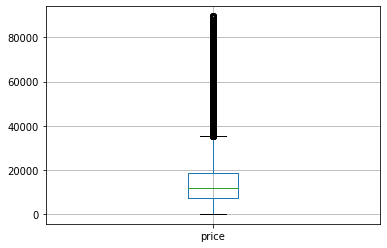

In [55]:
# Find the mean and standard dev
std_price = df_regression['price'].std()
mean_price = df_regression['price'].mean()

# Calculate the cutoff
cut_off = std_price * 3
lower, upper = mean_price - cut_off, mean_price + cut_off

# Trim the outliers
df_regression = df_regression[(df_regression['price'] < upper) \
                           & (df_regression['price'] > lower)]

# The trimmed box plot
df_regression[['price']].boxplot()
plt.show()

In [56]:
# remove any rows with null value, thus data cleaning is completed
df_regression = df_regression.dropna()
df_regression.isnull().sum()

mileage                 0
standard_colour         0
standard_make           0
standard_model          0
vehicle_condition       0
year_of_registration    0
price                   0
body_type               0
fuel_type               0
dtype: int64

#Data Exploration and Feature Engineering

##Dealing with USED column by Binarizing columns

In USED column, 1 means the car is used
0 means car is new

Binarizing columns could improve dataframe

In [57]:
# Create the used column filled with zeros
df_regression['used'] = 0

# Replace all the used values where vehicle_condition is USED
df_regression.loc[df_regression['vehicle_condition'] == 'USED', 'used'] = 1

# Print the first five rows of the columns
print(df_regression[['used', 'vehicle_condition']].head())
#drop vehicle_condition condition
df_regression =  df_regression.drop(columns = ['vehicle_condition'] )

   used vehicle_condition
1     1              USED
2     1              USED
3     1              USED
4     1              USED
5     1              USED


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


##Get age feature from year 

Year of registration means nothing but we could fetch car age from it

Car age could be important feature in predicting car price

Create new column called age and remove year of registration 

Convert age column to integer

In [58]:
df_regression['year_of_registration'] = 2022 - df_regression['year_of_registration']
df_regression['age'] = np.int32(df_regression['year_of_registration'])
df_regression =  df_regression.drop(columns = ['year_of_registration'] )

## Normalization for age

Normalization linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
Age is the perfect column to use MinMaxScaler

In [59]:
# Import MinMaxScaler
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df_regression[['age']])

# Transform the data using the fitted scaler
df_regression['age_MM'] = MM_scaler.transform(df_regression[['age']])

# Compare the origional and transformed column
print(df_regression[['age_MM', 'age']].head())

     age_MM  age
1  0.529412   11
2  0.176471    5
3  0.235294    6
4  0.352941    8
5  0.176471    5


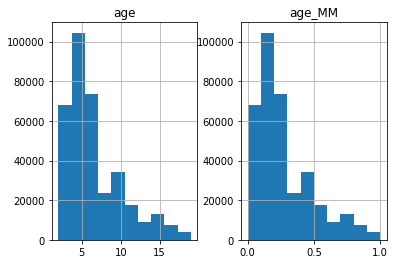

In [60]:
df_regression[['age', 'age_MM']].hist()
plt.show()

##Log transformation for  mileage
Mileage has a large amount of data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.

Thus log transformation is best suited to use to scale mileage

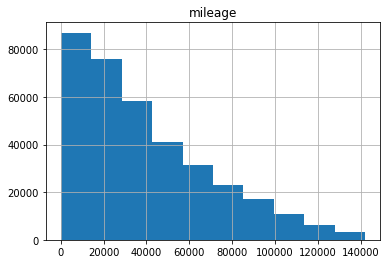

In [61]:
df_regression[['mileage']].hist()
plt.show()

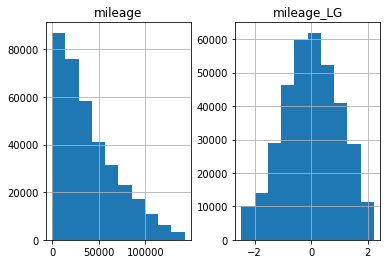

In [62]:
# Import PowerTransformer 
# Log transformation
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df_regression[['mileage']])

# Apply the power transform to the data
df_regression['mileage_LG'] = pow_trans.transform(df_regression[['mileage']])

# Plot the data before and after the transformation
df_regression[['mileage', 'mileage_LG']].hist()
plt.show()


##Log transformatioon of price

Price column also has a long right tail, thus log transformation is used to scale price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b7366be10>]],
      dtype=object)

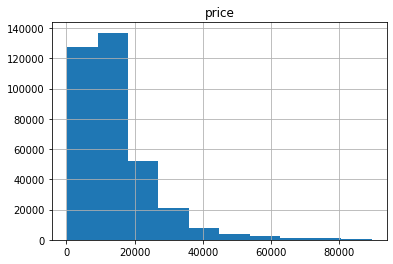

In [63]:
df_regression[['price']].hist()

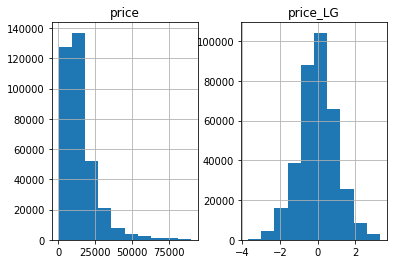

In [64]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df_regression[['price']])

# Apply the power transform to the data
df_regression['price_LG'] = pow_trans.transform(df_regression[['price']])

# Plot the data before and after the transformation
df_regression[['price', 'price_LG']].hist()
plt.show()

## Dropping Column
Dropping unnecessary columns

1. column Age_MM replace age
2. Column mileage_LG replace mileage
3. column price_LG replace price
4.  standard make is unnecessary becuase standard model is sufficient 


In [65]:
df_regression =  df_regression.drop(columns = ['age','mileage','price','standard_make'] )

##Dealing with standard model

Standard model columns has blank space and upper case

Thus, need to convert column to lower case and fill blank space with ___

In [66]:
df_regression['standard_model'] = df_regression['standard_model'].str.lower()


df_regression['standard_model'] = df_regression['standard_model'].replace(' ', '_', regex=True)


df_regression['standard_model'].value_counts()

golf         10532
corsa        10106
c_class       8094
3_series      7699
1_series      7268
             ...  
atom             1
11               1
gto              1
commodore        1
replica          1
Name: standard_model, Length: 878, dtype: int64

Standard model has many different categories but a very uneven distribution of their occurrences. 

In these cases, you may not want to create a feature for each value, but only the more common occurrences.

Thus, convert all value under 700 to Other 

In [67]:
# Create a series out of the standard_model column
standard_models = df_regression['standard_model']

# Get the counts of each category
standard_models_counts = standard_models.value_counts()

# Create a mask for only categories that occur less than 700 times
mask = standard_models.isin(standard_models_counts[standard_models_counts < 700].index)

# Label all other categories as Other
standard_models[mask] = 'Other'

df_regression['standard_model'] = standard_models 
print(pd.value_counts(df_regression['standard_model']))

Other        73365
golf         10532
corsa        10106
c_class       8094
3_series      7699
             ...  
a6_avant       737
v60            737
astra_gtc      728
slk            712
ioniq          706
Name: standard_model, Length: 132, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


##Dealing with colour

This situation is similair with standard model, thus will convert other rare colour to others 

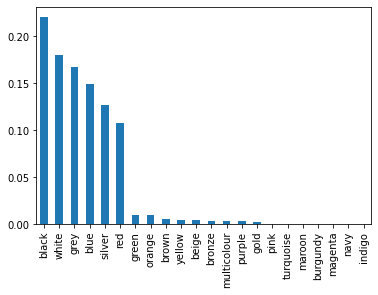

In [68]:
df_regression['standard_colour'] = df_regression['standard_colour'].str.lower()


df_regression['standard_colour'].value_counts(normalize=True, dropna=False).plot.bar();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


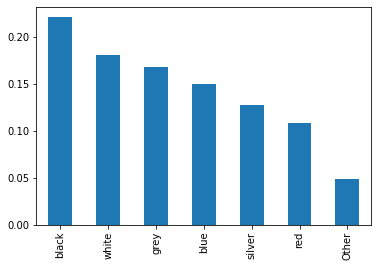

In [69]:
# Create a series out of the standard_colour column
standard_colours = df_regression['standard_colour']

# Get the counts of each category
standard_colours_counts = standard_colours.value_counts()

# Create a mask for only categories that occur less than 30000 times
mask = standard_colours.isin(standard_colours_counts[standard_colours_counts < 30000 ].index)

# Label all other categories as Other
standard_colours[mask] = 'Other'

df_regression['standard_colour'] = standard_colours 
df_regression['standard_colour'].value_counts(normalize=True, dropna=False).plot.bar();

##Dealing with fuel type

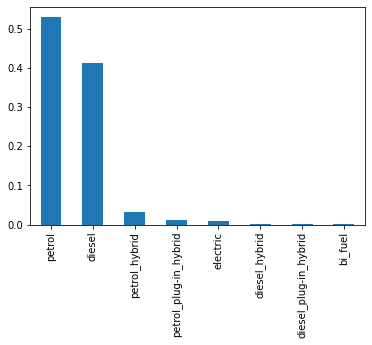

In [70]:
df_regression['fuel_type'] = df_regression['fuel_type'].str.lower()

df_regression['fuel_type'] = df_regression['fuel_type'].replace(' ', '_', regex=True)


df_regression['fuel_type'].value_counts(normalize=True, dropna=False).plot.bar();

Petrol plug in hybrid is same as petrol hybrid

Diesel plug in hybrid is same as diesel hybrid 

Thus, converting columns is recommended 

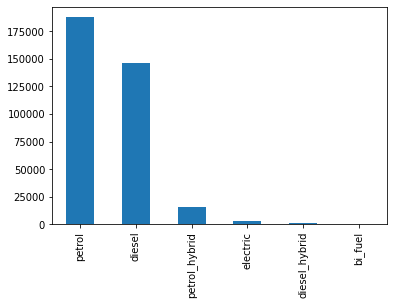

In [71]:
df_regression.loc[df_regression['fuel_type'] == 'petrol_plug-in_hybrid', 'fuel_type'] = 'petrol_hybrid'
df_regression.loc[df_regression['fuel_type'] == 'diesel_plug-in_hybrid', 'fuel_type'] = 'diesel_hybrid'

df_regression['fuel_type'].value_counts(dropna=False).plot.bar();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


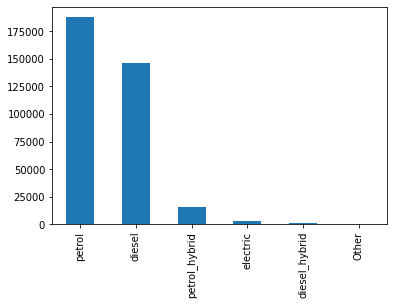

In [72]:
# Create a series out of the fuel_type column
fuel_types = df_regression['fuel_type']

# Get the counts of each category
fuel_types_counts = fuel_types.value_counts()

# Create a mask for only categories that occur less than 500 times
mask = fuel_types.isin(fuel_types_counts[fuel_types_counts < 500].index)

# Label all other categories as Other
fuel_types[mask] = 'Other'

df_regression['fuel_type'] = fuel_types 
df_regression['fuel_type'].value_counts(dropna=False).plot.bar();

##Dealing with body type

This column has many rare categories that should be converted to Other.


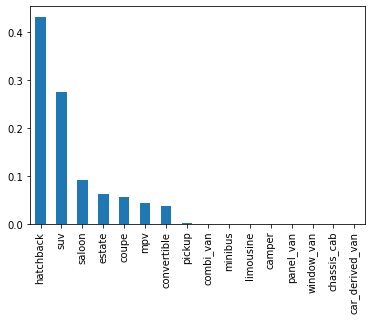

In [73]:
df_regression['body_type'] = df_regression['body_type'].str.lower()

df_regression['body_type'] = df_regression['body_type'].replace(' ', '_', regex=True)


df_regression['body_type'].value_counts(normalize=True, dropna=False).plot.bar();

In [74]:
# Create a series out of the body_type column
body_types = df_regression['body_type']

# Get the counts of each category
body_types_counts = body_types.value_counts()

# Create a mask for only categories that occur less than 500 times
mask = body_types.isin(body_types_counts[body_types_counts < 500].index)

# Label all other categories as Other
body_types[mask] = 'Other'

df_regression['body_type'] = body_types 
print(pd.value_counts(df_regression['body_type']))

hatchback      153066
suv             97657
saloon          32613
estate          22134
coupe           19738
mpv             15115
convertible     13208
Other             992
Name: body_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [75]:
df_regression.head()

,standard_colour,standard_model,body_type,fuel_type,used,age_MM,mileage_LG,price_LG
1,blue,xf,saloon,diesel,1,0.529412,1.706222,-0.655011
2,grey,yeti,suv,petrol,1,0.176471,-1.102008,0.236820
3,Other,mokka,hatchback,diesel,1,0.235294,0.411936,-0.493375
4,grey,range_rover_sport,suv,diesel,1,0.352941,0.874999,1.202562
5,blue,Other,convertible,petrol,1,0.176471,-0.611602,1.315752


# Prepraing for Model Building 


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
!pip install -q shap
import shap
shap.initjs()

     |████████████████████████████████| 564 kB 5.1 MB/s 


##One hot encoding

###One hot encoding with fuel type

In [78]:
# Create dummy variables for the fuel_type column
df_regression = pd.get_dummies(df_regression, columns=['fuel_type'], drop_first=True, prefix='FUEL_')

# Print the columns names
print(df_regression.columns)

Index(['standard_colour', 'standard_model', 'body_type', 'used', 'age_MM',
       'mileage_LG', 'price_LG', 'FUEL__diesel', 'FUEL__diesel_hybrid',
       'FUEL__electric', 'FUEL__petrol', 'FUEL__petrol_hybrid'],
      dtype='object')


###One hot encoding with body type

In [79]:
# Create dummy variables for the body_type column
df_regression = pd.get_dummies(df_regression, columns=['body_type'], drop_first=True, prefix='BODY_')

# Print the columns names
print(df_regression.columns)

Index(['standard_colour', 'standard_model', 'used', 'age_MM', 'mileage_LG',
       'price_LG', 'FUEL__diesel', 'FUEL__diesel_hybrid', 'FUEL__electric',
       'FUEL__petrol', 'FUEL__petrol_hybrid', 'BODY__convertible',
       'BODY__coupe', 'BODY__estate', 'BODY__hatchback', 'BODY__mpv',
       'BODY__saloon', 'BODY__suv'],
      dtype='object')


###One hot encoding with standard model

In [80]:
# Create dummy variables for the standard_model column
df_regression = pd.get_dummies(df_regression, columns=['standard_model'], drop_first=True, prefix='MODEL_')

# Print the columns names
print(df_regression.columns)

Index(['standard_colour', 'used', 'age_MM', 'mileage_LG', 'price_LG',
       'FUEL__diesel', 'FUEL__diesel_hybrid', 'FUEL__electric', 'FUEL__petrol',
       'FUEL__petrol_hybrid',
       ...
       'MODEL__x5', 'MODEL__xc40', 'MODEL__xc60', 'MODEL__xc90', 'MODEL__xe',
       'MODEL__xf', 'MODEL__yaris', 'MODEL__yeti', 'MODEL__zafira',
       'MODEL__zafira_tourer'],
      dtype='object', length=148)


###One hot encoding with standard colour

In [81]:
# Create dummy variables for the standard_colour column
df_regression = pd.get_dummies(df_regression, columns=['standard_colour'], drop_first=True, prefix='COLOUR_')

# Print the columns names
print(df_regression.columns)

Index(['used', 'age_MM', 'mileage_LG', 'price_LG', 'FUEL__diesel',
       'FUEL__diesel_hybrid', 'FUEL__electric', 'FUEL__petrol',
       'FUEL__petrol_hybrid', 'BODY__convertible',
       ...
       'MODEL__yaris', 'MODEL__yeti', 'MODEL__zafira', 'MODEL__zafira_tourer',
       'COLOUR__black', 'COLOUR__blue', 'COLOUR__grey', 'COLOUR__red',
       'COLOUR__silver', 'COLOUR__white'],
      dtype='object', length=153)


### Get target column 

price is the target feature 

In [82]:
X, y = df_regression.drop(columns='price_LG'), df_regression['price_LG']
print(len(df_regression.columns))

153


#RandomForests Regression

##Building Model

In [238]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
# train test split for forest 
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2)

In [241]:
rfr = RandomForestRegressor()
rfr.fit(X_train_forest, y_train_forest)

RandomForestRegressor()

In [242]:
# save model into gdrive
#import pickle
#with open('/content/drive/MyDrive/Colab Notebooks/rfr.pickle', 'wb') as files:
#    pickle.dump(rfr, files)

In [120]:

# load saved model
#with open('/content/drive/MyDrive/Colab Notebooks/rfr.pickle' , 'rb') as f:
#    rfr = pickle.load(f)

## RMSE, r2_score and cross_val_score

In [243]:
from sklearn.metrics import r2_score

preds_forest = rfr.predict(X_test_forest)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test_forest, preds_forest))

r2_score = r2_score(y_test_forest, preds_forest)

score = np.mean(cross_val_score(rfr, X_test_forest, y_test_forest))

print("RMSE: %f" % (rmse))## 
print("r2_score: %f" % (r2_score))##  percentage of data capture
print("score: %f" % (score))##  accuracy 

RMSE: 0.394800
r2_score: 0.843145
score: 0.830813


##True vs Predicted plots

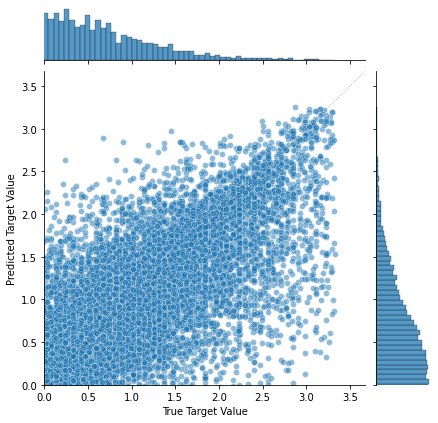

In [244]:
g = sns.jointplot(x=y_test_forest, y=preds_forest, alpha=0.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [0, max(x1, y1)]
g.ax_joint.set(xlim=lims, ylim=lims)
g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
g.ax_joint.set(xlabel='True Target Value')
g.ax_joint.set(ylabel='Predicted Target Value');


##Residual Plots


In [245]:
residuals_df_forest = preds_forest - y_test_forest

In [246]:
residuals_df_forest.head()

226681    0.206228
60721     0.123151
283688    0.058233
195366   -0.210515
108020   -0.166189
Name: price_LG, dtype: float64

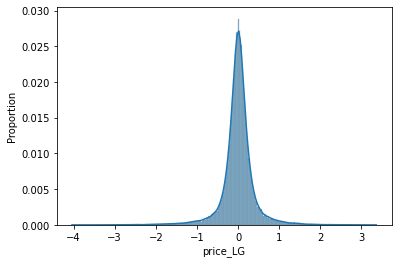

In [247]:
sns.histplot(x=residuals_df_forest, kde=True, stat='proportion');

In [248]:
residuals_df_forest.mean(), residuals_df_forest.median(), residuals_df_forest.std()

(0.0016633185765319726, 0.008132127703738279, 0.39479949172870527)

## SHAP value

SHAP value is not analysed because it took too much time and not practical 

## Model Analysis
 

RandomForest Regression has following results 

RMSE: 0.394800

r2_score: 0.843145

score: 0.830813

RMSE is low compare to other model.

r2_score is high, means that 84% of data showing a high level of correlation

cross_val_score return 83% of accuracy 

According to True vs Predicted Plot, points are close to the fitted line, with narrow confidence bands. It shows good results.

AS for residual plot, most residual values are at 0 


#Gradient Boosted Tree with XGBoost

##Building Model

In [83]:
import xgboost as xgb


In [84]:
# Create the training and test sets
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X, y, test_size=0.2, random_state=123)

In [85]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor()

# Fit the regressor to the training set
xg_reg.fit(X_train_boost, y_train_boost)

[15:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [86]:
#import pickle

# save model 
#with open('/content/drive/MyDrive/Colab Notebooks/xg_reg.pickle', 'wb') as files:
#    pickle.dump(xg_reg, files)
    

In [ ]:
# load saved model
#with open('/content/drive/MyDrive/Colab Notebooks/xg_reg.pickle' , 'rb') as f:
#    xg_reg = pickle.load(f)

## RMSE, r2_score and cross_val_score

In [87]:
from sklearn.metrics import r2_score
# Predict the labels of the test set: preds
preds_boost = xg_reg.predict(X_test_boost)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test_boost, preds_boost))

r2_score = r2_score(y_test_boost, preds_boost)

score = np.mean(cross_val_score(xg_reg, X_test_boost, y_test_boost))

print("RMSE: %f" % (rmse))##
print("r2_score: %f" % (r2_score))##  percentage of data capture
print("score: %f" % (score))##  accuracy 

[15:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.486077
r2_score: 0.764086
score: 0.762313


##True vs predicted plot


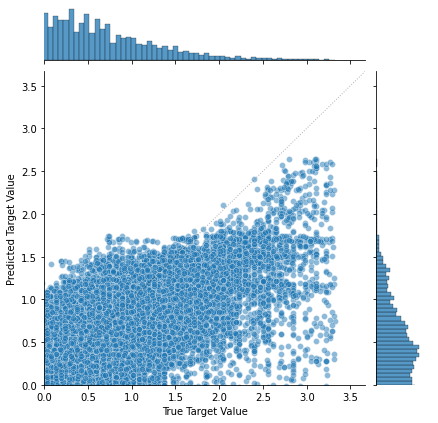

In [88]:
# g = sns.jointplot(x=y, y=adv_mvlr_model.predict(X), ylim=(0,30), xlim=(0,30))
g = sns.jointplot(x=y_test_boost, y=preds_boost, alpha=0.5)
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
# https://seaborn.pydata.org/generated/seaborn.JointGrid.html
# g.set(ylim=(0,25))
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
# lims = [min(x0, y0), max(x1, y1)] # more generic solution
lims = [0, max(x1, y1)]
g.ax_joint.set(xlim=lims, ylim=lims)
g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
g.ax_joint.set(xlabel='True Target Value')
g.ax_joint.set(ylabel='Predicted Target Value');


## Residual plot


In [89]:
residuals_df = preds_boost - y_test_boost

In [90]:
residuals_df.head()

310856   -0.060355
82171    -0.008994
214250    0.184102
90291     0.113419
315453   -0.662628
Name: price_LG, dtype: float64

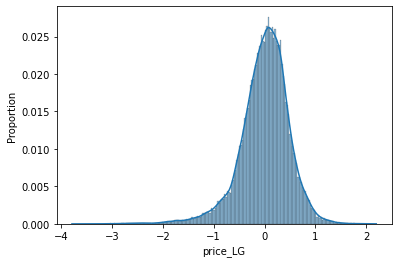

In [91]:
sns.histplot(x=residuals_df, kde=True, stat='proportion');

In [92]:
residuals_df.mean(), residuals_df.median(), residuals_df.std()

(-0.0013617073928588934, 0.03944883227969054, 0.48607841769277105)

## SHAP value

In [93]:
# this instantiates an Explainer object for global and local explanations
# on the Random Forest Model
explainer = shap.TreeExplainer(xg_reg)

In [94]:
# we can ask the explainer for the SHAP values on the test data
shap_values = explainer.shap_values(X_test_boost)

In [95]:
shap_values.shape

(70905, 152)

In [96]:
pd.DataFrame(shap_values, columns=X_test_boost.columns)

,used,age_MM,mileage_LG,FUEL__diesel,FUEL__diesel_hybrid,FUEL__electric,FUEL__petrol,FUEL__petrol_hybrid,BODY__convertible,BODY__coupe,...,MODEL__yaris,MODEL__yeti,MODEL__zafira,MODEL__zafira_tourer,COLOUR__black,COLOUR__blue,COLOUR__grey,COLOUR__red,COLOUR__silver,COLOUR__white
0,0.0,0.297366,0.166323,-0.005348,0.0,-0.000950,0.125471,-0.002259,-0.002117,-0.014192,...,0.0,0.0,0.002773,0.0,-0.006518,-1.370135e-06,-0.002334,0.003478,0.0,0.0
1,0.0,-0.981854,-0.674730,-0.013138,0.0,-0.000730,0.061100,-0.002050,-0.000751,-0.014063,...,0.0,0.0,0.000119,0.0,-0.003801,-1.332232e-06,-0.002334,-0.015914,0.0,0.0
2,0.0,0.124414,-0.293717,0.019714,0.0,-0.001531,0.080485,0.034141,-0.000887,-0.008414,...,0.0,0.0,0.000112,0.0,-0.001683,-8.558365e-07,0.008546,0.002795,0.0,0.0
3,0.0,0.183637,0.317931,-0.038675,0.0,-0.000683,0.107047,-0.001265,-0.002119,-0.010176,...,0.0,0.0,0.000112,0.0,-0.003801,-1.370135e-06,-0.002334,0.002810,0.0,0.0
4,0.0,0.277154,-0.061225,-0.005293,0.0,-0.002150,0.107264,-0.001611,-0.000887,-0.009116,...,0.0,0.0,0.000112,0.0,-0.004028,2.311075e-05,-0.002334,0.002810,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70900,0.0,0.253463,0.135782,-0.007960,0.0,-0.001031,0.125925,-0.001611,-0.002117,-0.010176,...,0.0,0.0,0.000112,0.0,-0.002657,-1.370135e-06,0.008546,0.002810,0.0,0.0
70901,0.0,0.402072,0.572602,-0.005445,0.0,-0.001372,0.143776,-0.001611,-0.002117,-0.009295,...,0.0,0.0,0.000112,0.0,-0.004028,2.311075e-05,-0.002334,0.002810,0.0,0.0
70902,0.0,0.383195,0.324560,0.008446,0.0,-0.001328,-0.115241,-0.001413,-0.002117,-0.017247,...,0.0,0.0,0.000112,0.0,0.014197,-1.370135e-06,-0.000997,0.002795,0.0,0.0
70903,0.0,0.233442,-0.316657,-0.005285,0.0,-0.001580,0.085636,-0.001413,-0.000887,-0.008579,...,0.0,0.0,0.000112,0.0,0.014197,-8.558365e-07,-0.000997,0.002810,0.0,0.0


In [97]:
# we can investigate a local explanation with the position index of the instance
# of interest
row_idx = 1

In [98]:
# for some reason, Colab needs the Javascript to be initialised in each cell...
shap.initjs()
# a local explanation with force_plot
shap.force_plot(
    explainer.expected_value, 
    shap_values[row_idx], 
    X_test_boost.iloc[row_idx]
)

age, mileage and body type hatchback have huge impact on decreasing car price 

mean while, fuel petrol and model 1 series have imapct on incresing car price

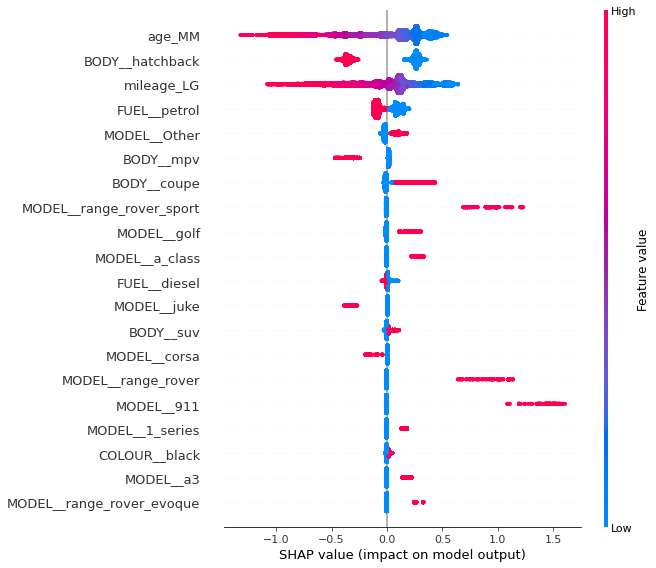

In [99]:
# a global explanation
shap.summary_plot(shap_values, X_test_boost)

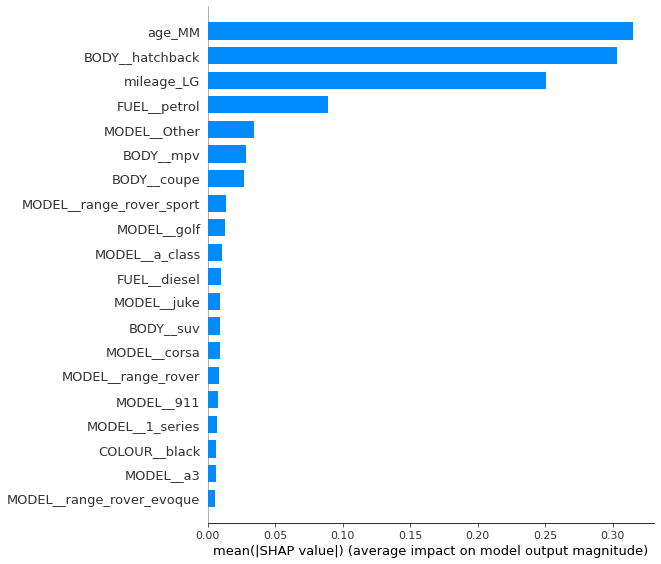

In [100]:
# a global explanation: mean absolute SHAP as feature importance
shap.summary_plot(shap_values, X_test_boost, plot_type="bar")

## Model Analysis

Gradient Boosted Tree with XGBoost has following results 

RMSE: 0.486077

r2_score: 0.764086

score: 0.762313

RMSE is low and acceptable.

r2_score is high, means that 76% of data showing a high level of correlation

cross_val_score return 76% of accuracy 

According to True vs Predicted Plot, points are leaning to right and not close to fitted line. 

AS for residual plot, most residual values are at 0 

For SHAP value, age, mileage and body type hatchback have huge impact on decreasing price while model 1 series and pretrol fuel have imapct on increasing price. 

This is common because the higher the mileage and age, the lower the prices
The value of car price drops as time pass. New car shows more value. 


# Linear regression with selected interaction

##Building Model

In [101]:
from sklearn.linear_model import LinearRegression
from patsy import dmatrix

In [103]:
data_regression_i = df_regression.assign(
    Age_mileage_hatchback=df_regression['age_MM']*df_regression['mileage_LG']+df_regression['BODY__hatchback']
)
data_regression_i

,used,age_MM,mileage_LG,price_LG,FUEL__diesel,FUEL__diesel_hybrid,FUEL__electric,FUEL__petrol,FUEL__petrol_hybrid,BODY__convertible,...,MODEL__yeti,MODEL__zafira,MODEL__zafira_tourer,COLOUR__black,COLOUR__blue,COLOUR__grey,COLOUR__red,COLOUR__silver,COLOUR__white,Age_mileage_hatchback
1,1,0.529412,1.706222,-0.655011,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.903294
2,1,0.176471,-1.102008,0.236820,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,-0.194472
3,1,0.235294,0.411936,-0.493375,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.096926
4,1,0.352941,0.874999,1.202562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.308823
5,1,0.176471,-0.611602,1.315752,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,-0.107930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,1,0.058824,-1.322071,-0.136537,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.922231
402001,1,0.647059,1.734917,-1.986206,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2.122593
402002,1,0.470588,0.612644,-0.612747,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.288303
402003,1,0.294118,-0.932736,-0.030010,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.725666


In [107]:
X_i = dmatrix("0 + (age_MM*mileage_LG*BODY__hatchback) + FUEL__petrol + MODEL__Other + BODY__mpv + BODY__coupe + MODEL__range_rover_sport + MODEL__golf + MODEL__a_class + FUEL__diesel + MODEL__juke + BODY__suv + MODEL__corsa + MODEL__range_rover + MODEL__911", data=X, return_type="dataframe")


In [108]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_i, y, test_size=0.2)

In [109]:
lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)

LinearRegression()

In [110]:
# save model
#with open('/content/drive/MyDrive/Colab Notebooks/lr.pickle', 'wb') as files:
#    pickle.dump(lr, files)
    

In [ ]:
# load saved model
#with open('/content/drive/MyDrive/Colab Notebooks/lr.pickle' , 'rb') as f:
#    lr = pickle.load(f)

## RMSE, r2_score and cross_val_score

In [111]:
from sklearn.metrics import r2_score
# Predict the labels of the test set: preds
preds_lr = lr.predict(X_test_lr)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test_lr, preds_lr))

r2__score = r2_score(y_test_lr, preds_lr)

score = np.mean(cross_val_score(lr, X_test_lr, y_test_lr))

print("RMSE: %f" % (rmse))##
print("r2_score: %f" % (r2__score))## data captured
print("score: %f" % (score))## data captured

RMSE: 0.549821
r2_score: 0.697006
score: 0.696851


##True vs predicted plot


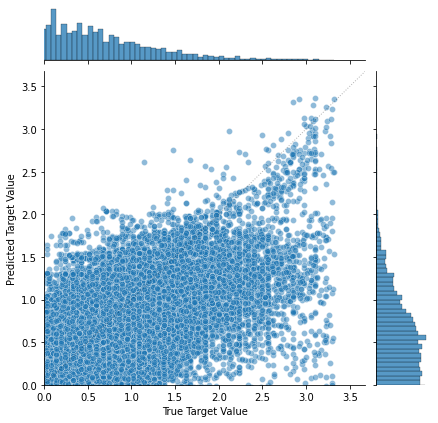

In [112]:
# g = sns.jointplot(x=y, y=adv_mvlr_model.predict(X), ylim=(0,30), xlim=(0,30))
g = sns.jointplot(x=y_test_lr, y=preds_lr, alpha=0.5)
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
# https://seaborn.pydata.org/generated/seaborn.JointGrid.html
# g.set(ylim=(0,25))
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
# lims = [min(x0, y0), max(x1, y1)] # more generic solution
lims = [0, max(x1, y1)]
g.ax_joint.set(xlim=lims, ylim=lims)
g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
g.ax_joint.set(xlabel='True Target Value')
g.ax_joint.set(ylabel='Predicted Target Value');


## Residuel plot

In [113]:
residuals_df_lr = preds_lr - y_test_lr

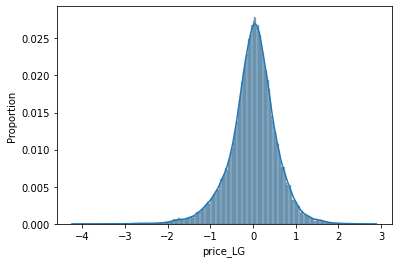

In [114]:
sns.histplot(x=residuals_df_lr, kde=True, stat='proportion');

In [115]:
residuals_df_lr.mean(), residuals_df_lr.median(), residuals_df_lr.std()

(-0.00014345061865713354, 0.027136978435401346, 0.5498248232734028)

## SHAP value

Model type not yet supported by TreeExplainer

## Model analysis

Linear Regression with selected interaction has following results 

RMSE: 0.549821

r2_score: 0.697006

score: 0.696851

RMSE is high and not promising compare to other model.

r2_score is low, means that 69% of data showing a low level of correlation

cross_val_score return 69% of accuracy 

According to True vs Predicted Plot, points are leaning to right and not close to fitted line. 

As for residual plot, most residual values are at 0 

#Esemble method of model above with voting

Voting method is chosen because voting is suitable for having odd number and different type of regressor 

## Building Model

In [117]:
from sklearn.ensemble import VotingRegressor

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
# Create and fit the voting classifier

clf_vote = VotingRegressor(
    estimators=[('boost', xg_reg), ('lr', lr), ('rfr',rfr)]
)
clf_vote.fit(X_train, y_train)

[15:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('boost', XGBRegressor()),
                            ('lr', LinearRegression()),
                            ('rfr', RandomForestRegressor())])

In [122]:
import pickle
# create an iterator object with write permission - model.pickle
#with open('/content/drive/MyDrive/Colab Notebooks/clf_vote.pickle', 'wb') as files:
#    pickle.dump(clf_vote, files)
    

In [123]:
# load saved model
#with open('/content/drive/MyDrive/Colab Notebooks/clf_vote.pickle' , 'rb') as f:
#    clf_vote = pickle.load(f)

[16:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## RMSE, r2_score and cross_val_score

In [124]:
from sklearn.metrics import r2_score
# Predict the labels of the test set: preds
preds_voting = clf_vote.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds_voting))

r2__score = r2_score(y_test, preds_voting)

score = np.mean(cross_val_score(clf_vote, X_test, y_test))

print("RMSE: %f" % (rmse))##
print("r2_score: %f" % (r2__score))## data captured
print("score: %f" % (score))## data captured

[16:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:09:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.405164
r2_score: 0.835949
score: 0.829753


##True vs predicted plot


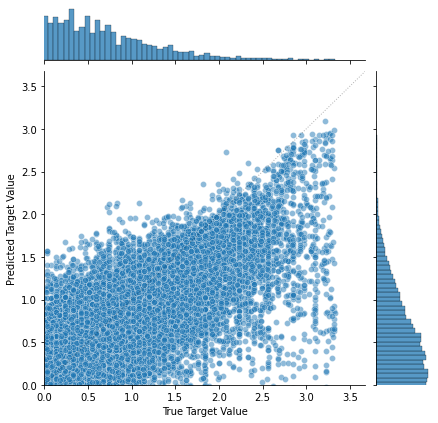

In [125]:
g = sns.jointplot(x=y_test, y=preds_voting, alpha=0.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [0, max(x1, y1)]
g.ax_joint.set(xlim=lims, ylim=lims)
g.ax_joint.plot(lims, lims, ':k', alpha=0.3, lw=1);
g.ax_joint.set(xlabel='True Target Value')
g.ax_joint.set(ylabel='Predicted Target Value');


## Residual Plot

In [128]:
residuals_df_voting = preds_voting - y_test

In [129]:
residuals_df_voting.head()

337823    0.088622
396476    0.187743
175635    0.058440
21743     0.514465
340040   -0.201855
Name: price_LG, dtype: float64

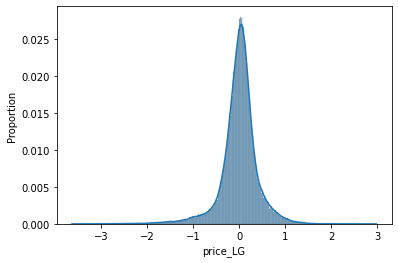

In [130]:
sns.histplot(x=residuals_df_voting, kde=True, stat='proportion');

In [131]:
residuals_df_voting.mean(), residuals_df_voting.median(), residuals_df_voting.std()

(-0.0005756222750630197, 0.022142284485609107, 0.40516628417109446)

## Model Analysis
RandomForest Regression has following results 

RMSE: 0.405164

r2_score: 0.835949

score: 0.829753

RMSE is low compare to other model.

r2_score is high, means that 83% of data showing a high level of correlation

cross_val_score return 82% of accuracy 

According to True vs Predicted Plot, points are close to the fitted line, but leaning to right. Result is acceptable. 

As for residual plot, most residual values are at 0 


# Conclusion

## Model Selection

Random Forest
RMSE: 0.394800
r2_score: 0.843145
score: 0.830813


Gradient boost with XGBoost
RMSE: 0.486077
r2_score: 0.764086
score: 0.762313

Linear Regression
RMSE: 0.549821
r2_score: 0.697006
score: 0.696851

Voting 
RMSE: 0.405164
r2_score: 0.835949
score: 0.829753

According to the results, RandomForest Regressor produces the best result with lowest RMSE, high r2_score and high cross val score.
Voting method also produces good results. 

**Thus, RandomForestRegressor is highly recommened.**

## Critical Reflection and Evaluation

Huge attention has been placed on feature engineering. Getting age feature from year of registration is vital for getting better dataframe. Scaling numeric columns such as age, mileage and price are proven to be effective. Removing many rare categories in body types, color, fuel petrol and standard model are important which not only reduce columns size but also improving results. 

However, hyperparameter process is negected. Results from model could have been better if hyperparameter such as GridSearchCV is used. 



## Future Works

I would like to try hyperparameter tuning every model for getting better results. I would like to try GridSearchCV for RandomForest Regressor.

Finally, I would like to implement preprocessing and pipelines to further enchance model performance. 